<a href="https://colab.research.google.com/github/BrandonJChan/301FinalProject/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring My Summer Streaming

Let's take a look at what kinds of songs I listened to last summer.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
spotify_df = pd.read_csv('https://github.com/BrandonJChan/301FinalProject/blob/master/Data/final.csv?raw=true')

In [3]:
spotify_df.sort_values('plays', ascending=False).iloc[0:10]

,trackName,artistName,msPlayed,duration_ms,plays,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Say It (feat. Tove Lo),Flume,15502360,262521,59.051885,1,62,0.598,0.532,3,-6.833,0,0.0295,0.06680,0.000003,0.0617,0.261,74.963,4
2,Feel Good (feat. Daya),Gryffin,10724803,248156,43.217988,0,72,0.625,0.707,2,-4.761,1,0.0337,0.22000,0.000000,0.2130,0.479,138.064,4
3,Never Be Like You (feat. Kai),Flume,8174487,234910,34.798378,1,68,0.444,0.557,0,-5.476,1,0.0602,0.45300,0.000000,0.1520,0.296,115.058,4
8,Indigo,88rising,5583657,173473,32.187470,0,68,0.819,0.664,7,-5.612,1,0.0828,0.09580,0.000002,0.2630,0.710,144.988,4
168,Hungry Hippo,Tierra Whack,1692154,60000,28.202567,1,67,0.894,0.610,4,-5.691,0,0.0487,0.02270,0.007440,0.1020,0.780,136.640,4
19,Floating (feat. Khalid),Alina Baraz,4821299,174490,27.630804,0,71,0.660,0.447,1,-9.026,0,0.0482,0.81000,0.000002,0.1100,0.578,84.950,4
4,Get You (feat. Kali Uchis),Daniel Caesar,7469173,278180,26.850144,0,76,0.658,0.294,4,-8.533,0,0.0321,0.42200,0.000052,0.0749,0.358,74.038,4
18,Belong to You (feat. 6LACK),Sabrina Claudio,4865441,185617,26.212260,0,68,0.605,0.553,10,-10.845,0,0.1010,0.27400,0.015200,0.1840,0.620,152.076,4
75,Ecdysis,Flume,2690958,104889,25.655293,0,56,0.541,0.739,8,-6.198,0,0.0843,0.00123,0.028300,0.4480,0.212,118.903,4
9,La Lune (feat. Dan Smith),Madeon,5519516,219840,25.106969,0,50,0.460,0.736,9,-3.039,1,0.0303,0.05580,0.000007,0.2160,0.253,139.905,4


#Visualizing Plays
Let's look at our variable of interest.

In [0]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Distribution of Plays')

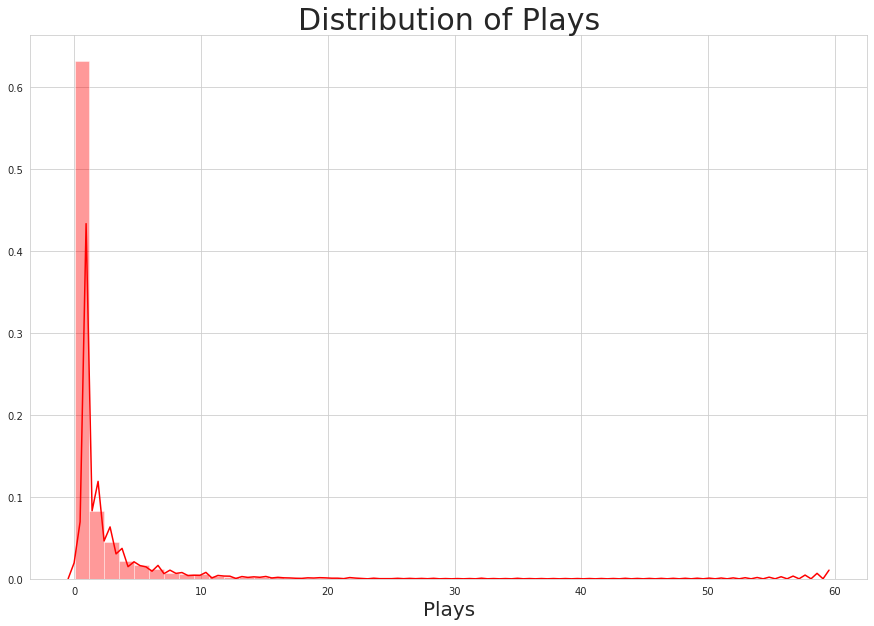

In [5]:
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.distplot(spotify_df['plays'], color = 'r')
ax.set_xlabel('Plays', fontsize = 20)
ax.set_title('Distribution of Plays', fontsize = 30)

From this graph, we can see that almost all of the songs I listened to are skipped after the first few seconds. There are a relatively small number of songs that I will listen to over and over again.

##Visualizing audio features
Now, let's get familiar with the audio features and how they are distributed.

Let's take a look at danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.

To be able to plot them next to each other and compare their distributions, I will standardize the audio features.

In [0]:
audio_features = spotify_df[['danceability',
                            'energy',
                            'key',
                            'loudness',
                            'speechiness',
                            'acousticness',
                            'instrumentalness',
                            'liveness',
                            'valence',
                            'tempo']]

audio_features_st = (
    (audio_features - audio_features.mean()) / 
    audio_features.std()
)

#Dropping extreme outlier songs. These songs are literally silent, so the loudness attribute will be extremely low.
audio_features_st.drop([2359, 4380, 1422, 4244, 3894], inplace = True) 

Melt DataFrame so it can be easily plotted.

In [0]:
audio_features_melt = audio_features_st.melt(var_name = 'feature')

[Text(0, 0, 'danceability'),
 Text(0, 0, 'energy'),
 Text(0, 0, 'key'),
 Text(0, 0, 'loudness'),
 Text(0, 0, 'speechiness'),
 Text(0, 0, 'acousticness'),
 Text(0, 0, 'instrumentalness'),
 Text(0, 0, 'liveness'),
 Text(0, 0, 'valence'),
 Text(0, 0, 'tempo')]

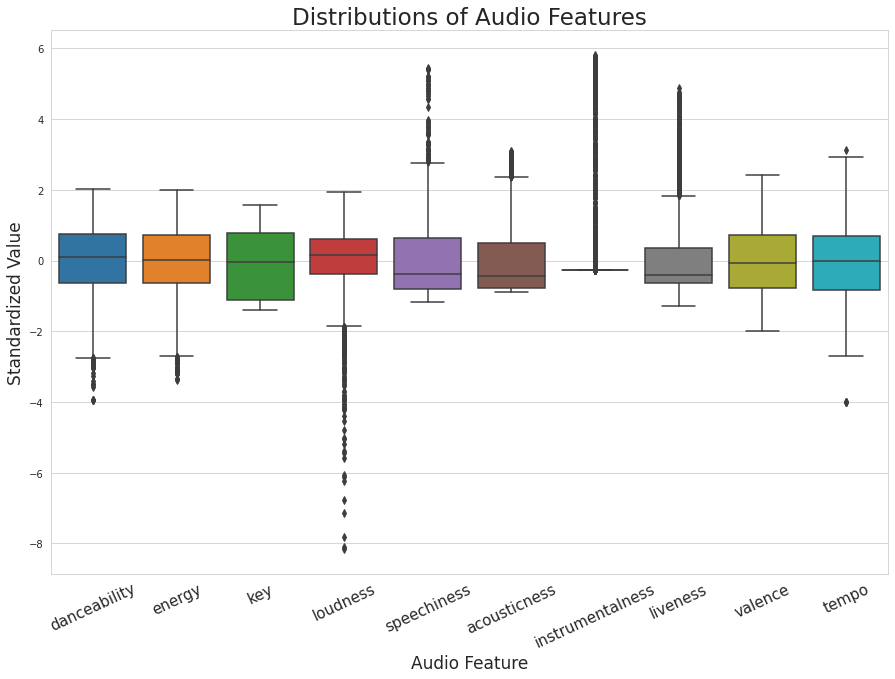

In [8]:
dims = (15, 10)

fig, ax = plt.subplots(figsize=dims)

ax = sns.boxplot(ax=ax, 
                 data=audio_features_melt, 
                 x = 'feature', 
                 y = 'value')

ax.set_xlabel('Audio Feature', fontsize = 17)
ax.set_ylabel('Standardized Value', fontsize = 17)
ax.set_title('Distributions of Audio Features', fontsize = 23)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, fontsize=15)

Before we get into the analysis of this graph, it's important that we know what these features mean. Some of the features are self-explanatory, but some the names are deceiving. This is what each of the features measure:
*   Danceability - rhythm, tempo, beat strength, overall regularity.
*   Energy - intensity and activity
*   Key - estimated overall key of a track
*   Loudness - decibels averaged across the entire track
*   Speechiness - presence of spoken word
*   Acousticness - how acoustic a track sounds
*   Instrumentallness - how prevalent vocals are in a track
*   Liveness - presence of a live audience
*   Valence - musical positiveness
*   Tempo - estimated beats per minute

For each of the audio features we can see that:


*   Danceability is skewed towards songs that are less danceable.
*   Energy is skewed towards songs that are less energetic.
*   Key is symmetrically distributed across the keys.
*   Loudness is heavily skewed towards songs that are quieter.
*   Speechiness is skewed towards songs that have more spoken word.
*   Acousticness is skewed towards songs that are more acoustic.
*   Instrumentalness is heavily distributed towards songs with vocals.
*   Liveness is skewed towards songs that sound more live.
*   Valence is symettrically distributed.
*   Tempo is symetrically distributed.



##Visualizing Non-Audio Features
Now, let's look at the non-audio features like the length of the song, whether or not it is explicit, and its popularity.

Text(0.5, 1.0, 'Distribution of Song Length')

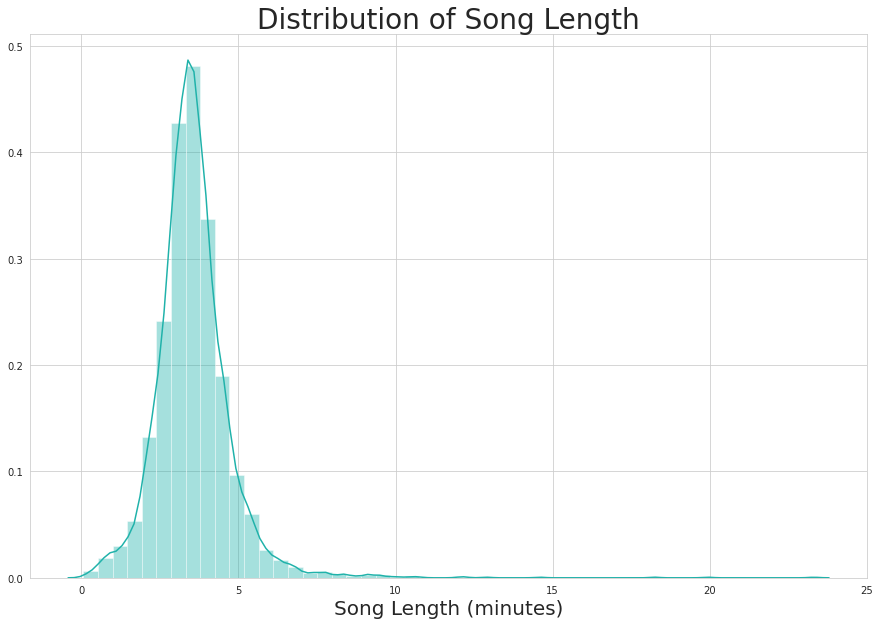

In [9]:
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.distplot(spotify_df['duration_ms'] / 60000, color = 'lightseagreen')
ax.set_xlabel('Song Length (minutes)', fontsize = 20)
ax.set_title('Distribution of Song Length', fontsize = 28)

Nothing too crazy here. Song lengths are centered at around 3 and a half minutes. Craziest thing here is that I've listened to some 20-minute songs.

In [10]:
dims = (8, 9)

explicit_df = pd.DataFrame(spotify_df['explicit'].value_counts(normalize = True))
explicit_df['Proportion'] = explicit_df['explicit']
explicit_df['Explicit'] = pd.Series(['Non-Explicit', 'Explicit'])
explicit_df[['Explicit', 'Proportion']]

,Explicit,Proportion
1,Explicit,0.611591
0,Non-Explicit,0.388409


[Text(0, 0, 'Explicit'), Text(0, 0, 'Non-Explicit')]

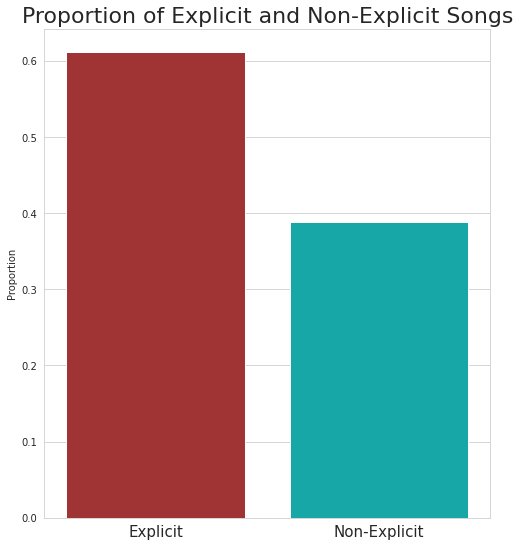

In [11]:
ax = plt.subplots(figsize=dims)
ax = sns.barplot(x = 'Explicit', 
                 y = 'Proportion', 
                 data = explicit_df, 
                 palette = ['firebrick', 'c'])

ax.set_xlabel('')
ax.set_title('Proportion of Explicit and Non-Explicit Songs', fontsize = 22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

61 percent of the songs I listened to were explicit, while 39 percent of the songs I listened to were not explicit.

Text(0.5, 1.0, 'Distribution of Song Popularity')

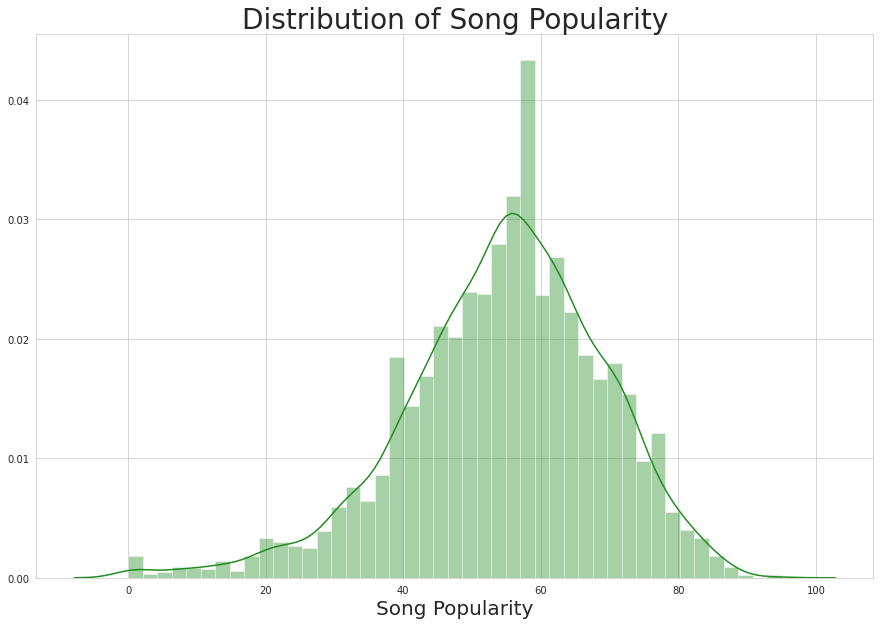

In [12]:
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.distplot(spotify_df['popularity'], color = 'forestgreen')
ax.set_xlabel('Song Popularity', fontsize = 20)
ax.set_title('Distribution of Song Popularity', fontsize = 28)

Most of the songs I listen to have popularities in the high fifities. The songs I listen to are slightly skewed towards less popular songs.

##Feature Correlations
Now what we're really intereseted in is how these features are related to plays as well as each other. First, let's take a look at the relationship between plays and my favorite artists by seeing how plays are distributed for my most played artsits.

In [13]:
top_artists = spotify_df.groupby('artistName')['plays'].sum().sort_values(ascending = False).iloc[0:10]
top_artists_df = pd.DataFrame(top_artists)
top_artists_df

,plays
artistName,
Flume,354.982242
Travis Scott,247.589400
Daniel Caesar,235.366191
Denzel Curry,223.771626
BROCKHAMPTON,216.763479
Tierra Whack,190.556521
Madeon,145.090538
Rich Brian,140.538049
Gryffin,136.030361


These are my most played artsits of the summer. Let's check out their distributions of plays.

[Text(0, 0, 'Flume'),
 Text(0, 0, 'Travis Scott'),
 Text(0, 0, 'Daniel Caesar'),
 Text(0, 0, 'Denzel Curry'),
 Text(0, 0, 'BROCKHAMPTON'),
 Text(0, 0, 'Tierra Whack'),
 Text(0, 0, 'Madeon'),
 Text(0, 0, 'Rich Brian'),
 Text(0, 0, 'Gryffin'),
 Text(0, 0, 'Childish Gambino')]

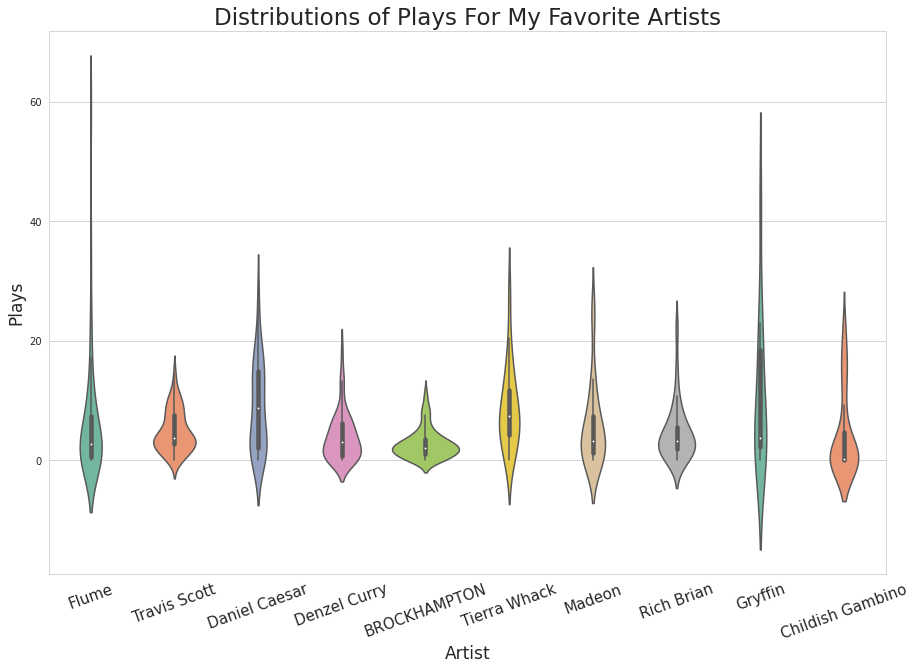

In [14]:
top_artists_plays = spotify_df[spotify_df['artistName'].isin(top_artists_df.index)]

dims = (15, 10)
ax = plt.subplots(figsize=dims)
ax = sns.violinplot(x = 'artistName', 
                    y = 'plays', 
                    data = top_artists_plays, 
                    palette='Set2',
                    order = top_artists_df.index)
ax.set_xlabel('Artist', fontsize = 17)
ax.set_ylabel('Plays', fontsize = 17)
ax.set_title('Distributions of Plays For My Favorite Artists', fontsize = 23)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, fontsize=15)

We can see that the distribution of plays for my favorite artists follows the same shape as the distribution of plays for all artists. Even for my favorite artists, many of their songs I only listen to several times, but there are always those few songs that I am addicted to.

What I know for sure is that if any of these artists come out with a song, they are guaranteed to get several plays. This gives me hope that artists will be predictive for plays.

##Correlation Matrix

Now, let's dive into the quantitaive relationships. I'm working with a lot of quantitative variables, so it's best to look at a correlation matrix that summarizes the relationships between every quantitative variable.

[Text(0, 0.5, 'plays'),
 Text(0, 1.5, 'explicit'),
 Text(0, 2.5, 'popularity'),
 Text(0, 3.5, 'danceability'),
 Text(0, 4.5, 'energy'),
 Text(0, 5.5, 'key'),
 Text(0, 6.5, 'loudness'),
 Text(0, 7.5, 'mode'),
 Text(0, 8.5, 'speechiness'),
 Text(0, 9.5, 'acousticness'),
 Text(0, 10.5, 'instrumentalness'),
 Text(0, 11.5, 'liveness'),
 Text(0, 12.5, 'valence'),
 Text(0, 13.5, 'tempo')]

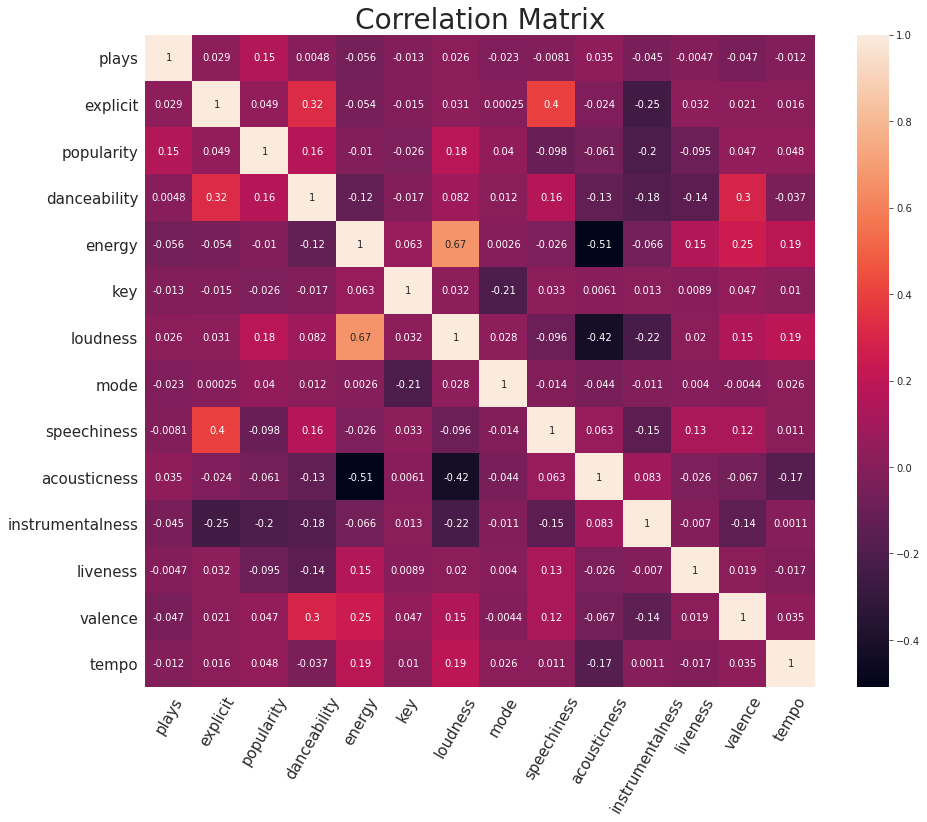

In [15]:
variables_only = spotify_df.drop(['trackName',
                                  'artistName',
                                  'msPlayed',
                                  'duration_ms',
                                  'time_signature'],
                                 axis = 1)

dims = (15, 12)
ax = plt.subplots(figsize=dims)
ax = sns.heatmap(data = variables_only.corr(),
                 annot = True)
ax.set_title('Correlation Matrix', fontsize = 28)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

So it looks like a lot's going on here, but in reality, there isn't really too much going on. There are barely any variables that are correlated with eachother. The most notable correlations are the strong positive correlation between loudness and energy along with the negative correlations between acousticness and loudness and acousticness and energy. All of the other variables are not highly correlated with each other as none of those correlations go above 0.4.

Unfortunately, plays is barely correlated with the features. Plays has the most correlation with popularity at 0.15, which is very low. This is preliminary evidence that predictions using these variables won't be too great.

Despite these findings, I will push forward!

